In [5]:
#!pip install matplotlib ipywidgets

In [6]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

In [11]:
def rag_arch():
  PLOT("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 3]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

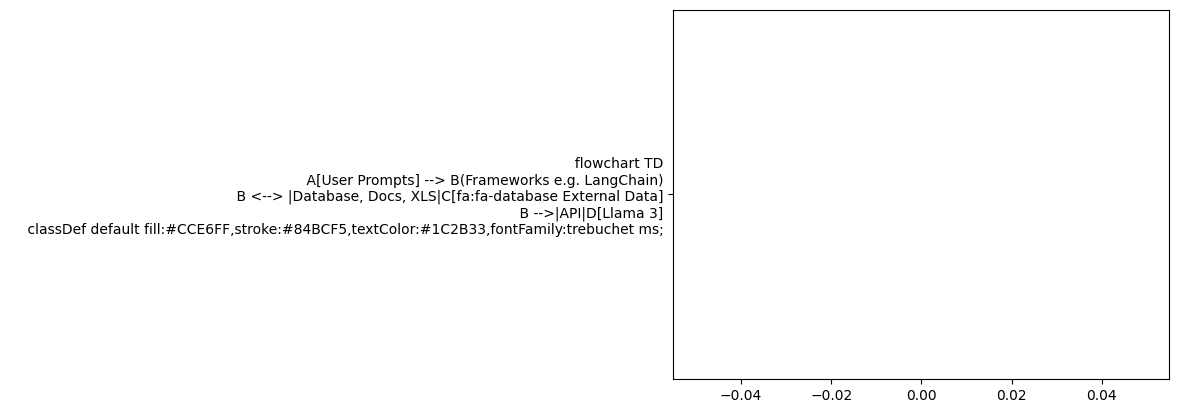

In [12]:
rag_arch()

In [18]:
!pip install langchain
!pip install langchain-community
!pip install sentence-transformers
!pip install faiss-cpu
!pip install bs4
!pip install langchain-groq

LangChain Q&A Retriever**
* ConversationalRetrievalChain

* Query the Source documents


In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
import bs4

# Step 1: Load the document from a web url
loader = WebBaseLoader(["https://en.wikipedia.org/wiki/Ozone_depletion"])
documents = loader.load()

# Step 2: Split the document into chunks with a specified chunk size
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
all_splits = text_splitter.split_documents(documents)

# Step 3: Store the document into a vector store with a specific embedding model
vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

<ipython-input-5-18d389896d59>:16: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate wit

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

You'll need to first sign in at Groq with your github or gmail account, then get an API token to try Groq out for free.

Groq is an open-source, Python-based framework for querying and manipulating graph data structures. It provides a simple and expressive way to work with graphs, allowing developers to perform various operations on graph data, such as querying, filtering, and aggregating. <br>


How to get Groq API Key? <br>


1.   Sign Up or Log In
2.   go to the groq cloud then click on the API keys:https://console.groq.com/keys
3. Get the API token, copy and save for future use



In [20]:
import os
from getpass import getpass

GROQ_API_TOKEN = getpass()

os.environ["GROQ_API_KEY"] = GROQ_API_TOKEN

··········


In [21]:
import ipywidgets as widgets
from IPython.display import display, Markdown

def md(t):
  display(Markdown(t))

In [22]:
from langchain_groq import ChatGroq
llm = ChatGroq(temperature=0, model_name="llama3-8b-8192")

In [23]:
from langchain.chains import ConversationalRetrievalChain

# Query against your own data
chain = ConversationalRetrievalChain.from_llm(llm,vectorstore.as_retriever(),return_source_documents=True)

# no chat history passed
result = chain({"question": "what is the problem in Ozone layer?", "chat_history": []})
md(result['answer'])


The problem in the Ozone layer is ozone depletion, which is caused by manufactured chemicals, especially halocarbon refrigerants, solvents, propellants, and foam-blowing agents (chlorofluorocarbons (CFCs), HCFCs, halons), referred to as ozone-depleting substances (ODS). These substances are transported into the stratosphere and release atoms that deplete the ozone layer, leading to the formation of the ozone hole.

In [24]:
# Now previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
query = "What are two related events?"
chat_history = [(query, result["answer"])]
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

Two related events that are mentioned in the context are:

1. Climate change and civilizational collapse
2. Ecological collapse

These two events are related because climate change is a major driver of ecological collapse, which can lead to the collapse of civilizations.